<a href="https://colab.research.google.com/github/MohebZandi/Comupter_Vision/blob/main/Biomedical_Image_Processing_Data_Camp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive') 
dir = '/content/gdrive/My Drive/Video_Image_processing/'

Mounted at /content/gdrive


Image type: <class 'imageio.core.util.Array'>
Shape of image array: (512, 512)


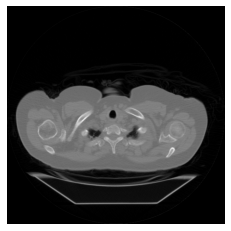

In [13]:
# Import ImageIO
import imageio

# Load "chest-220.dcm"
im = imageio.imread(dir + 'chest-220.dcm')

# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)

#show the Image
plt.imshow(im, cmap= 'gray')
plt.axis('off')
plt.show()

Metadata
ImageIO reads in data as Image objects. These are standard NumPy arrays with a dictionary of metadata.

Metadata can be quite rich in medical images and can include:

Patient demographics: name, age, sex, clinical information
Acquisition information: image shape, sampling rates, data type, modality (such as X-Ray, CT or MRI)

Start this exercise by reading in the chest image and listing the available fields in the meta dictionary.

In [6]:
# Import ImageIO
import imageio
im = imageio.imread(dir + 'chest-220.dcm')

# Dict([('TransferSyntaxUID', '1.2.840.10008.1.2'), ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'), 
# ('SOPInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.290866807370146801046392918286'), ('StudyDate', '20040529'), 
# ('SeriesDate', '20040515'), ('ContentDate', '20040515'), ('StudyTime', '115208'), ('SeriesTime', '115254'), 
# ('ContentTime', '115325'), ('Modality', 'CT'), ('Manufacturer', 'GE MEDICAL SYSTEMS'), ('StudyDescription', 'PET CT with registered MR'), 
# ('SeriesDescription', 'CT IMAGES - RESEARCH'), ('PatientName', 'STS_007'), ('PatientID', 'STS_007'), ('PatientBirthDate', ''), 
# ('PatientSex', 'F '), ('PatientWeight', 82.0), ('StudyInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.381397737790414481604846607090'), 
# ('SeriesInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.315477836840324582280843038439'), ('SeriesNumber', 2), ('AcquisitionNumber', 1), ('InstanceNumber', 57), 
# ('ImagePositionPatient', (-250.0, -250.0, -180.62)), ('ImageOrientationPatient', (1.0, 0.0, 0.0, 0.0, 1.0, 0.0)), ('SamplesPerPixel', 1), 
# ('Rows', 512), ('Columns', 512), ('PixelSpacing', (0.976562, 0.976562)), ('BitsAllocated', 16), ('BitsStored', 16), ('HighBit', 15), 
# ('PixelRepresentation', 0), ('RescaleIntercept', -1024.0), ('RescaleSlope', 1.0), 
# ('PixelData', b'Data converted to numpy array, raw data removed to preserve memory'), ('shape', (512, 512)), ('sampling', (0.976562, 0.976562))])


# Print the available metadata fields
print(im.meta.keys())
# Output:
# odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 
# 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 
# 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 
# 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 
# 'PixelData', 'shape', 'sampling'])


print('\nPatientSex : ',im.meta['PatientSex'])

odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])

PatientSex :  F 


Plot images
Perhaps the most critical principle of image analysis is: look at your images!

Matplotlib's imshow() function gives you a simple way to do this. Knowing a few simple arguments will help:

- cmap controls the color mappings for each value. The "gray" colormap is common, but many others are available.

- vmin and vmax control the color contrast between values. Changing these can reduce the influence of extreme values.

- plt.axis('off') removes axis and tick labels from the image.

For this exercise, plot the CT scan and investigate the effect of a few different parameters.

In [7]:
def show_image(image, title='Image', cmap_type='gray'):
    import matplotlib.pyplot as plt
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

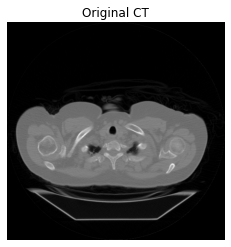

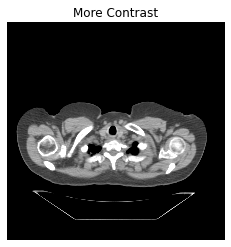

In [9]:
# Import ImageIO
import imageio

# Load "chest-220.dcm"
im = imageio.imread(dir + 'chest-220.dcm')

# Show Original CT
show_image(im, 'Original CT')

# Draw the image with greater contrast
plt.imshow(im, cmap= 'gray', vmin= -200, vmax= 200)

# Remove axis ticks and labels
plt.axis('off')
plt.title('More Contrast')
# Render the image
plt.show()

In [30]:
im1 = imageio.imread(dir + 'chest-220.dcm')
im2 = imageio.imread(dir + 'chest-221.dcm')
im3 = imageio.imread(dir + 'chest-222.dcm')
im4 = imageio.imread(dir + 'chest-224.dcm')

print(im1.shape)

vol_3 = np.stack([im1, im2, im3])
vol_4 = np.stack([im1, im2, im3, im4])
print(vol_3.shape)
print(vol_4.shape)

(512, 512)
(3, 512, 512)
(4, 512, 512)
